In [1]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [4]:
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import display

In [7]:
data = pd.read_excel('data_main.xlsx')

In [8]:
data.head()

,Date,Day_of_the_week,time,Cars_num,Автор,To_Russua,Imatra,Svet,Nuya,Bru,Vaalima,Torf
0,2019-01-13,Воскресенье,14:32:30,3.0,Настя,1,1,0,0,0,0,0
1,2019-01-13,Воскресенье,11:55:55,7.0,Alk,1,1,0,0,0,0,0
2,2019-01-12,Суббота,22:11:38,150.0,Виталий,1,1,0,0,0,0,0
3,2019-01-12,Суббота,19:35:29,NaN,Владтмир,1,1,0,0,0,0,0
4,2019-01-12,Суббота,17:52:16,NaN,Серж,1,1,0,0,0,0,0


In [9]:
data.describe()

,Cars_num,To_Russua,Imatra,Svet,Nuya,Bru,Vaalima,Torf
count,94949.000000,104524.000000,104524.000000,104524.000000,104524.000000,104524.000000,104524.000000,104524.000000
mean,56.135999,0.336851,0.036030,0.318979,0.042746,0.232109,0.031840,0.338296
std,104.863608,0.472636,0.186366,0.466083,0.202285,0.422180,0.175574,0.473132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,6900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.isna().sum()

Date                  0
Day_of_the_week       0
time                  0
Cars_num           9575
Автор                55
To_Russua             0
Imatra                0
Svet                  0
Nuya                  0
Bru                   0
Vaalima               0
Torf                  0
dtype: int64

In [11]:
data.dropna(inplace=True)
data.drop('Day_of_the_week',inplace=True,axis=1)

In [12]:
data['Date'].iloc[1]

Timestamp('2019-01-13 00:00:00')

In [13]:
data['Date'] = data['Date'].apply(lambda x: x.ctime())

In [14]:
df_tmp = data['Date'].str.split(None,expand=True)
df_tmp.drop(3,inplace=True,axis=1)
df_tmp.columns = ['Weekday', 'Month', 'Day', 'Year']
df_tmp['Day'] = pd.to_numeric(df_tmp['Day'], downcast='float')
df = pd.concat([df_tmp,data[data.columns[1:]]],axis=1)
df = df[['Year','Month','Day','time','Weekday']+list(df.columns[5:])]
df.sort_values(['Year','Month','Day','time'],inplace=True)

In [15]:
days_of_week = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
days_of_week_back = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

(62565, 14)


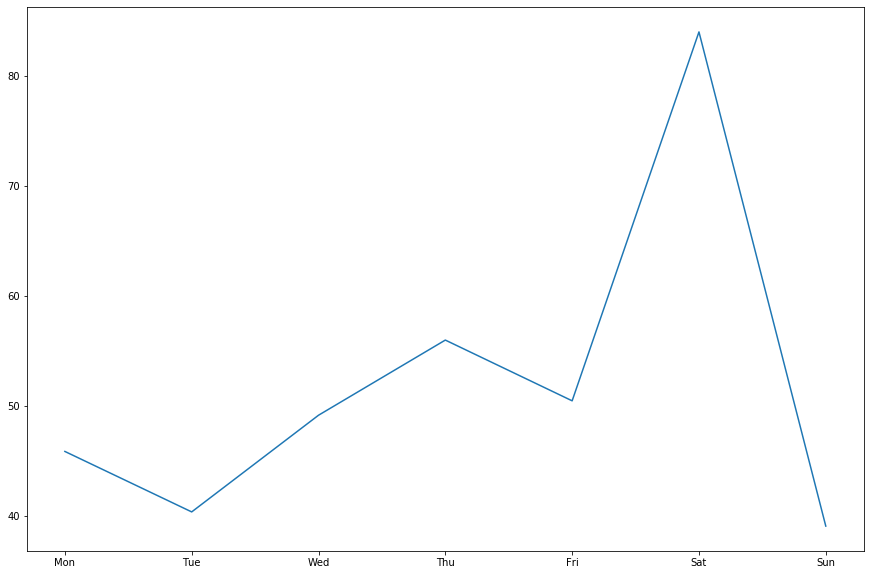

In [28]:
plt.figure(figsize=(15,10))
# df_tmp = df[(df['To_Russua']==0) & (df['Imatra']==1) & (df['Year'] == '2019')]
df_tmp = df[(df['To_Russua']==0) ]
print(df_tmp.shape)
gb = df_tmp.groupby(['Weekday']).mean().sort_index()
gb.index = pd.Index(data=list(map(lambda x:  days_of_week[x], gb.index)), name='Weekday')
gb.sort_index(inplace=True)
gb.index = pd.Index(data=list(map(lambda x:  days_of_week_back[x], gb.index)), name='Weekday')
plt.plot(gb['Cars_num'])
plt.show()

In [ ]:
pd.options.display.max_rows = None
display(df_tmp[df_tmp['Cars_num'] < 200])